#S09 T02: Aprenentatge Supervisat - Regressions


Anem a practicar i a familiaritzar-nos amb regressions
## Nivell 1

### - Exercici 1

Crea almenys tres models de regressió diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv.


In [8]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
#from scipy.stats import pearsonr
#from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#from sklearn.metrics import r2_score
#from sklearn.metrics import mean_squared_error
#import statsmodels.api as sm
#import statsmodels.formula.api as smf


In [9]:
file="DelayedFlights.csv"
df = pd.read_csv(file,low_memory=False)
df.head()


,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [19]:
df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [10]:
df_copy=df.copy()
df = df_copy.drop(['DayOfWeek','TailNum'],axis=1)
for column in ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','SecurityDelay','LateAircraftDelay']:
    df[column]=df[column].fillna(0)

df = df.dropna()
df.isna().sum()

Unnamed: 0           0
Year                 0
Month                0
DayofMonth           0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [11]:
df.NASDelay+df.SecurityDelay+df.LateAircraftDelay+df.WeatherDelay+df.CarrierDelay+df.DepDelay - df.ArrDelay

0          22.0
1          17.0
2          -6.0
3          34.0
4          14.0
           ... 
1936753    30.0
1936754    57.0
1936755    80.0
1936756     2.0
1936757    12.0
Length: 1928371, dtype: float64

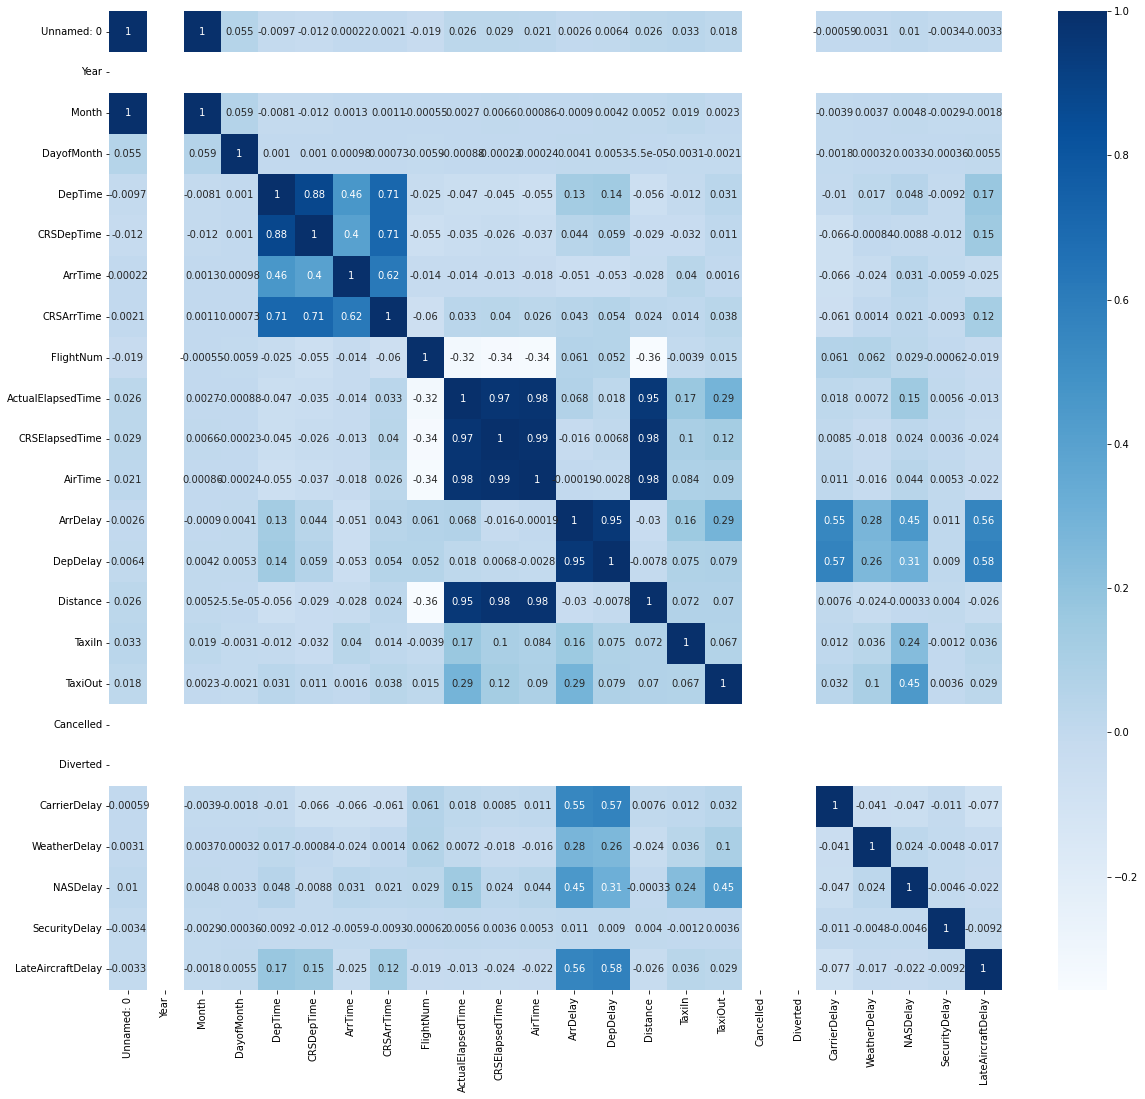

In [12]:
plt.figure(figsize=(20,18))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True, cmap=plt.cm.Blues)
plt.show()

In [23]:
X = df.drop(['Unnamed: 0', 'Year','CRSDepTime','CRSArrTime', 'ArrDelay'], axis=1).values
X = X[X['Cancelled'] == 0]
y = df.ArrDelay.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1234)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

### - Exercici 2

Compara’ls en base al MSE i al R2 .

### - Exercici 3

Entrena’ls utilitzant els diferents paràmetres que admeten.

### - Exercici 4

Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (validació interna)

## Nivell 2

### - Exercici 5

Realitza algun procés d’enginyeria de variables per millorar-ne la predicció


## Nivell 3

### - Exercici 6

No utilitzis la variable DepDelay a l’hora de fer prediccions

https://datapeaker.com/big-data/principales-bibliotecas-de-python-para-el-procesamiento-de-imagenes-en-2021/
https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html
